In [21]:
import pandas as pd
import numpy as np
import re
import datetime as dt

In [22]:
path='C:\\Users\\camendol\\Desktop\\'
file='PCRs.xlsx'

file_path=path+file

In [23]:
#Open connection to EXCEL
xl_file = pd.ExcelFile(file_path)
xl_file.sheet_names  

['PCRs']

In [24]:
#Read a tab
pcr_data=xl_file.parse('PCRs')

In [25]:
#pcr_data.info()

In [26]:
#Apply Date typing
pcr_data['Created']=pd.to_datetime(pcr_data['Creation Date'].str[0:20])
pcr_data['Updated']=pd.to_datetime(pcr_data['Last Update Date'].str[0:20])
pcr_data['Duration']=pcr_data['Updated'] - pcr_data['Created']
pcr_data['Duration']=pcr_data['Duration']/np.timedelta64(1,'D')

pcr_data['QA Expected']=pd.to_datetime(pcr_data['Expected Date to QA'].str[0:20])
pcr_data['QA Delivered']=pd.to_datetime(pcr_data['Actual Date to QA'].str[0:20])
pcr_data['PCR Approved']=pd.to_datetime(pcr_data['New PCR Approval Date'].str[0:20])  

In [27]:
#pcr_data.info()

In [28]:
current_team=[ 'Lois Nordstrom'\
              , 'Sue Szubzda'\
              ,'Tricia Huebner'\
              , 'Padmaja Gandhi'\
              ,'Phanikumar Jetti'\
              , 'Pragada Kumar'
              , 'Christopher Amendola']
legacy_team=[ 'Narasaiah Ch'\
             ,'Santhi George']

In [29]:
#Created:Year-to-date
created_YTD=pcr_data.loc[ ((pcr_data['Owner'].isin(current_team))
                               & (pcr_data['Created']>'2018-12-31'))\
                               ,('Formatted ID','Created','Updated','Name','Impact Kanban State','Owner')]\
        .sort_values(by='Created')
print(len(created_YTD))

73


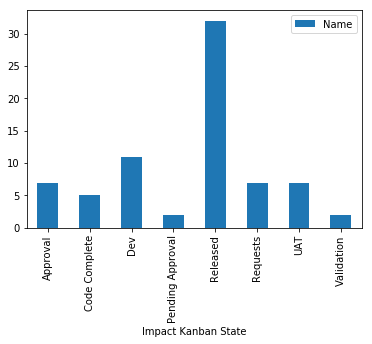

In [30]:
created_YTD[['Name','Impact Kanban State']].groupby(['Impact Kanban State'])\
        .count()\
        .plot(kind='bar')

In [31]:
#?Released last month? state released and update in last month - may not be perfect

30


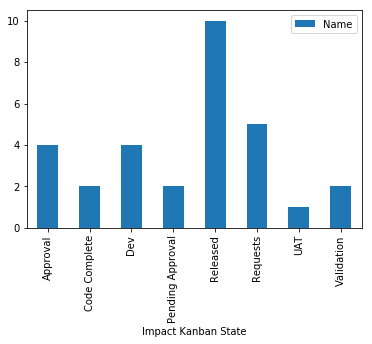

In [32]:
#Updated in last month
last_month_upd=created_YTD.loc[((created_YTD['Updated']> dt.datetime.today() - pd.DateOffset(months=1)))]
print(len(last_month_upd))
last_month_upd[['Name','Impact Kanban State']].groupby(['Impact Kanban State'])\
        .count()\
        .plot(kind='bar')

In [33]:
# Not updated in last 6 months
pcr_data.loc[ ((pcr_data['Impact Kanban State'] != 'Released') \
               & (pcr_data['Owner'].isin(current_team))\
               & (pcr_data['Updated']<  dt.datetime.today() - pd.DateOffset(months=6) ))\
            ,('Formatted ID','Created','Updated','Name','Impact Kanban State','Owner')]\
        .sort_values(by='Created').head(25)

,Formatted ID,Created,Updated,Name,Impact Kanban State,Owner
410,US246873,2016-05-08 19:34:00,2017-11-02 07:16:00,MVP: update the logic that creates the Busines...,Pending Approval,Sue Szubzda
398,US284440,2016-10-20 12:05:00,2019-02-05 09:49:00,Create a new II PULL lst report that shows sub...,Dev,Sue Szubzda
395,US313309,2017-01-12 11:18:00,2018-06-18 08:14:00,COMMON: Maps Redesign - Align Production and ...,Approval,Padmaja Gandhi
540,US377099,2017-09-19 12:49:00,2019-01-31 08:42:00,Ongoing support and Communications - Tricia,Requests,Tricia Huebner
544,US377097,2017-09-19 12:49:00,2019-01-31 08:43:00,Ongoing support and Communications - Phani,Requests,Phanikumar Jetti
424,US394524,2017-11-30 08:04:00,2018-04-26 04:29:00,Common -update Invoke_common_maps.sas to acc...,Pending Approval,Phanikumar Jetti


In [34]:
# Not updated in last 12 months
pcr_data.loc[ ((pcr_data['Impact Kanban State'] != 'Released') \
               & (pcr_data['Owner'].isin(current_team))
               & (pcr_data['Updated']<  dt.datetime.today() - pd.DateOffset(months=12) ))\
            ,('Formatted ID','Created','Updated','Name','Impact Kanban State','Owner')]\
        .sort_values(by='Created').head(25)

,Formatted ID,Created,Updated,Name,Impact Kanban State,Owner
410,US246873,2016-05-08 19:34:00,2017-11-02 07:16:00,MVP: update the logic that creates the Busines...,Pending Approval,Sue Szubzda
395,US313309,2017-01-12 11:18:00,2018-06-18 08:14:00,COMMON: Maps Redesign - Align Production and ...,Approval,Padmaja Gandhi
424,US394524,2017-11-30 08:04:00,2018-04-26 04:29:00,Common -update Invoke_common_maps.sas to acc...,Pending Approval,Phanikumar Jetti


In [35]:
#last_month_upd

In [36]:
# Look at sources can we find payer versus provider.
# By requestor

In [37]:
from pivottablejs import pivot_ui

In [38]:
pivot_ui(created_YTD)

In [39]:
import qgrid

In [40]:
z=qgrid.show_grid(created_YTD,show_toolbar=True)
z

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…